In [1]:
%load_ext autoreload
%autoreload 2
import all_function_defs as f

In [5]:
# All fluxes to excel

# path =  "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\Rt_IFO0880_LEBp2023\\Rt_IFO0880_LEBp2023_all_fluxes_biomass_max.xlsx"
# f.all_fluxes_to_excel(path, IFOjsb_all_fluxes_bm)

# path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\All_simulated_fluxes\\Rt_IFO0880_LEBp2023\\Rt_IFO0880_LEBp2023_all_fluxes_NGAM_min.xlsx"
# f.all_fluxes_to_excel(path, IFOjsb_all_fluxes_nm)

### BIOMASS MAXIMISATION

In [2]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "BIOMASS_RT"   
glc_ID = 'EX_glc__D_e'

IFOjsb_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
IFOjsb_all_fluxes_bm

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,PAPSR,FACOAL80p,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00006,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.198513
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.000145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.482057
2,0.0,0.0,0.0,0.0,0.0,0.0,-0.000217,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.719381
3,0.0,0.0,0.0,0.0,0.0,0.0,-0.000305,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.011369
4,0.0,0.0,0.0,0.0,0.0,0.0,-0.000412,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.364688


In [22]:
growth_rates = IFOjsb_all_fluxes_bm[biomass_rxn_ID]
growth_rates

0    0.033961
1    0.082468
2    0.123068
3     0.17302
4    0.233464
Name: BIOMASS_RT, dtype: object

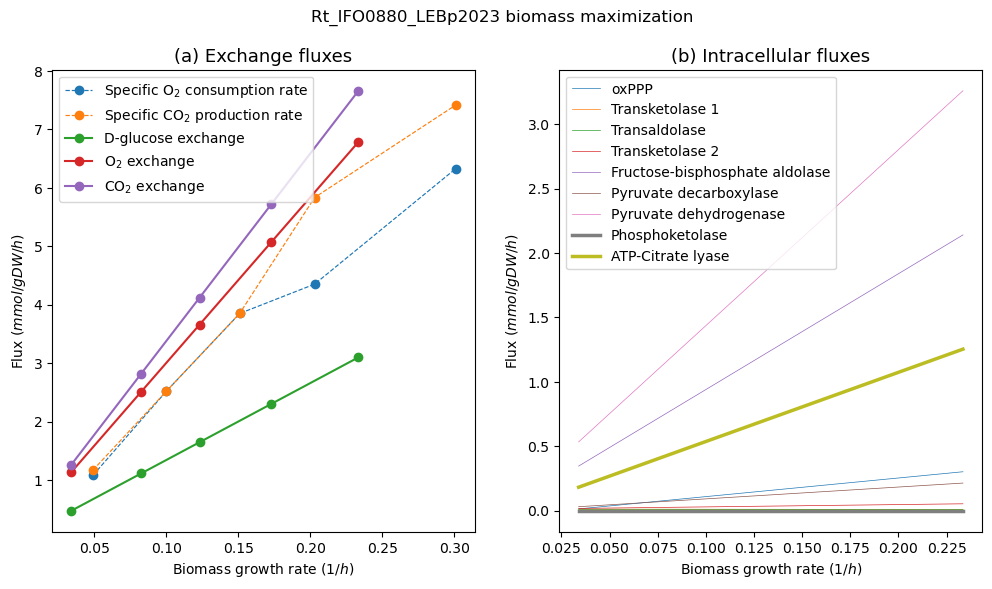

In [4]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL = ['XPK', 'ACITL']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_bm, phosphoketolase_ACL)

title = 'Rt_IFO0880_LEBp2023 biomass maximization'
fig = f.plot_ex_intr_fluxes(IFOjsb_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max.png")

In [9]:
intracellular_fluxes  
exchange_fluxes

,D-Glucose exchange,O2 exchange,CO2 exchange
0,-0.476,-1.137428,1.264728
1,-1.114,-2.510728,2.819853
2,-1.648,-3.660167,4.121479
3,-2.305,-5.074364,5.722917
4,-3.1,-6.785607,7.660731


In [7]:
phosphoketolase_ACL_fluxes

,Phosphoketolase,ATP-Citrate lyase
0,0.0,0.182372
1,0.0,0.442861
2,0.0,0.660888
3,0.0,0.929135
4,0.0,1.253725


COFACTOR balances

In [4]:
glucose_uptakes= [0.476, 1.114, 1.648, 2.305, 3.1] # 
# Cofactor lists
nadphs = ['nadph_c', 'nadph_m', 'nadph_x', 'nadph_r']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r']
atps = ['atp_c', 'atp_m', 'atp_x', 'atp_r', 'atp_v', 'atp_n'] 
i1 = 0
i2 = 4

SUM produced: 0.5721775402344459, SUM consumed: -0.5721775402344459
SUM produced: 1.38944029800854, SUM consumed: -1.3894402980085403


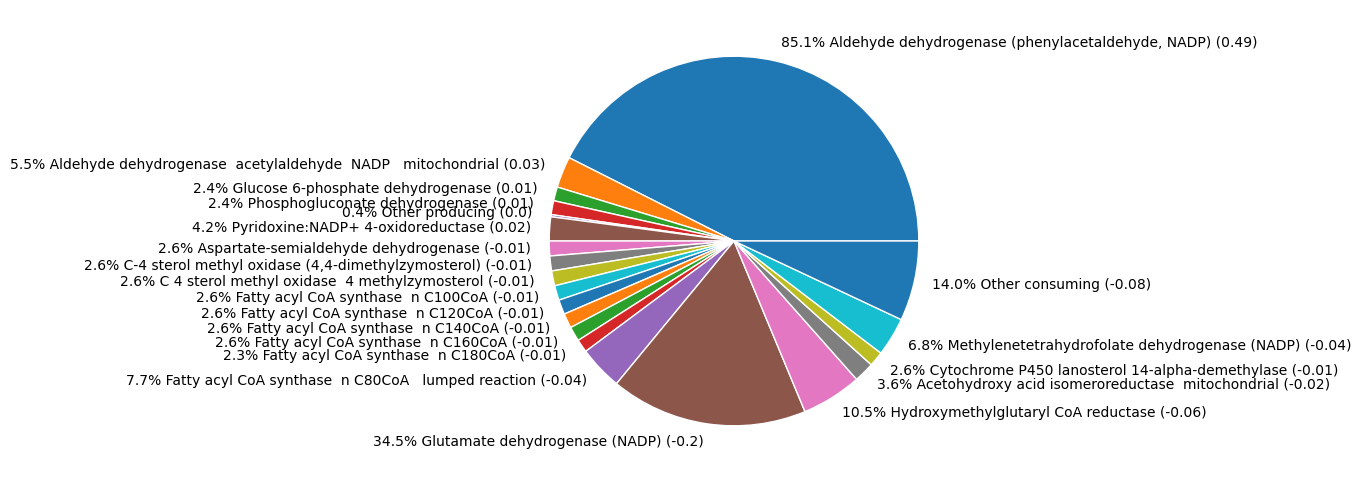

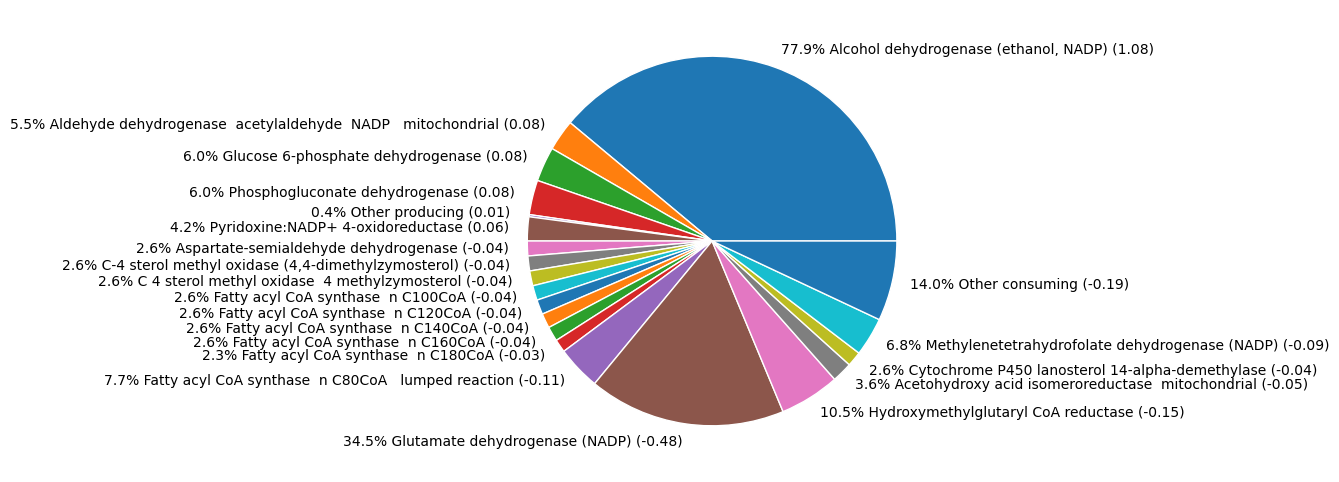

In [21]:

nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH.png")

# See on all GR
nadph_fluxes_1 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 1, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH1.png")

# nadph_fluxes_2 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 2, biomass_rxn_ID, glc_ID)
# nadph_fluxes_3 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 3, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3)

# nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# # #fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_biomass_max_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_1
# pie_nadph_fluxes_2
# pie_nadph_fluxes_3
# pie_nadph_fluxes_4

SUM produced: 2.442196319049079, SUM consumed: -2.442196319049079
SUM produced: 14.72159543824519, SUM consumed: -14.72159543824519


([<matplotlib.patches.Wedge at 0x24b3906ac00>,
 [Text(1.0857646129311325, 0.17639502630887444, '10.3% 2-oxoglutarate dehydrogenase (1.51)'),
  Text(0.7775314066101935, 0.7781034068392029, '29.5% Glyceraldehyde-3-phosphate dehydrogenase (4.35)'),
  Text(0.1435110154788385, 1.0905982708753177, '12.1% Isocitrate dehydrogenase  NAD (1.79)'),
  Text(-0.4457436722014168, 1.0056403823894484, '22.8% Malate dehydrogenase  mitochondrial (3.35)'),
  Text(-0.8080250143888804, 0.7463883547603417, '3.2% Other producing (0.47)'),
  Text(-1.0341598526109888, 0.374851169462786, '22.1% Pyruvate dehydrogenase (3.26)'),
  Text(-1.0465181435875273, -0.33882115509825494, '19.9% Alcohol dehydrogenase (ethanol) (-2.93)'),
  Text(-0.7882969428794054, -0.7671948447734666, '9.3% malate dehydrogenase (-1.36)'),
  Text(0.4580228774505614, -1.0001075160860997, '68.9% NADH dehydrogenase, mitochondrial (-10.15)'),
  Text(1.0995292375271901, -0.03217849938819531, '1.9% Other consuming (-0.27)')])

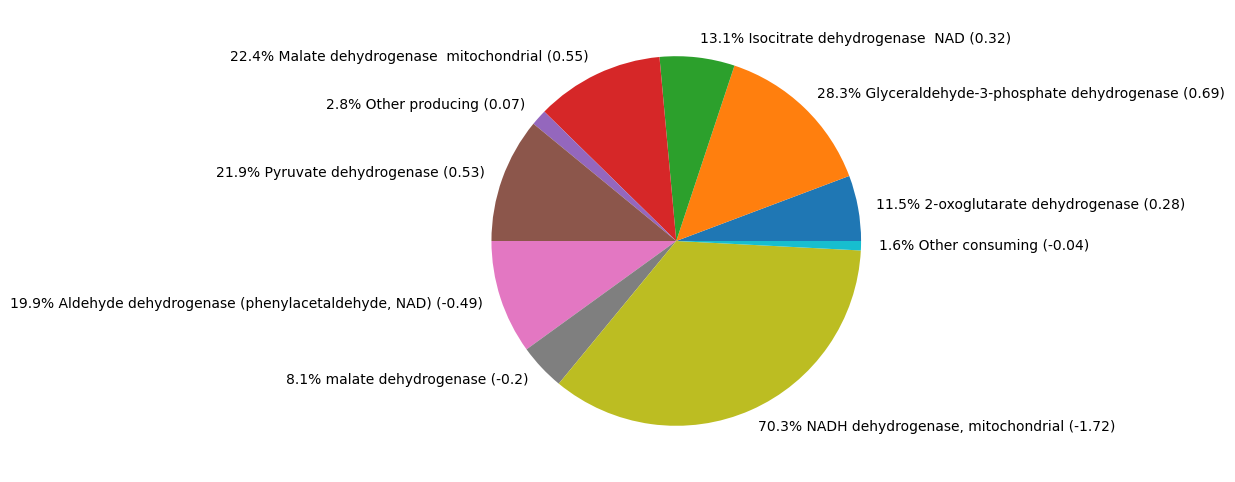

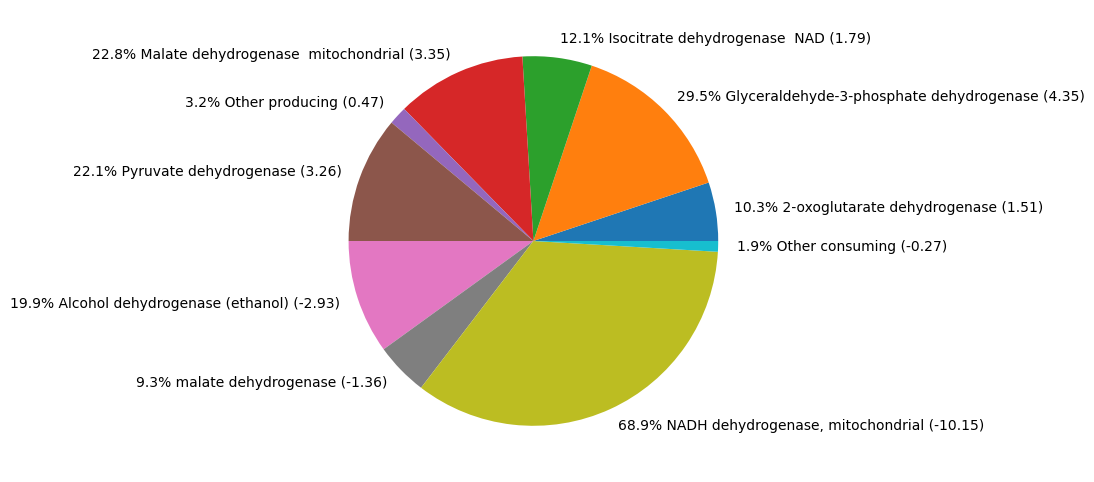

In [10]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 7.966086039658808, SUM consumed: -7.966086039658814
SUM produced: 47.18277816260432, SUM consumed: -47.18277816260432


([<matplotlib.patches.Wedge at 0x24b39bce660>,
 [Text(0.3633953585062925, 1.0382407299928487, '78.6% ATP synthase  mitochondrial (37.07)'),
  Text(-0.8599341401004184, 0.6859397019343276, '0.0% Other producing (0.0)'),
  Text(-0.9498674023497118, 0.5547539255863008, '9.2% Phosphoglycerate kinase (4.35)'),
  Text(-1.067901116979157, 0.2637938671665223, '9.0% Pyruvate kinase (4.26)'),
  Text(-1.0986138344384004, 0.05520545969879238, '3.2% Succinate  CoA ligase  ADP forming (1.51)'),
  Text(-1.0990419701516008, -0.04589932292842742, '2.7% ATP-Citrate lyase (-1.25)'),
  Text(-1.0902455194360414, -0.14616671081212917, '3.2% Adenylate kinase (-1.5)'),
  Text(-1.0725954464773202, -0.2440061642584436, '2.6% ATP maintenance requirement (-1.22)'),
  Text(-0.2408840558635746, -1.0733009231481703, '69.1% Biomass (-32.61)'),
  Text(0.9062230264969614, -0.6235060755491382, '6.6% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.043824326835423, -0.347031374239529, '11.4% Other consuming (-5.36)'),
  Tex

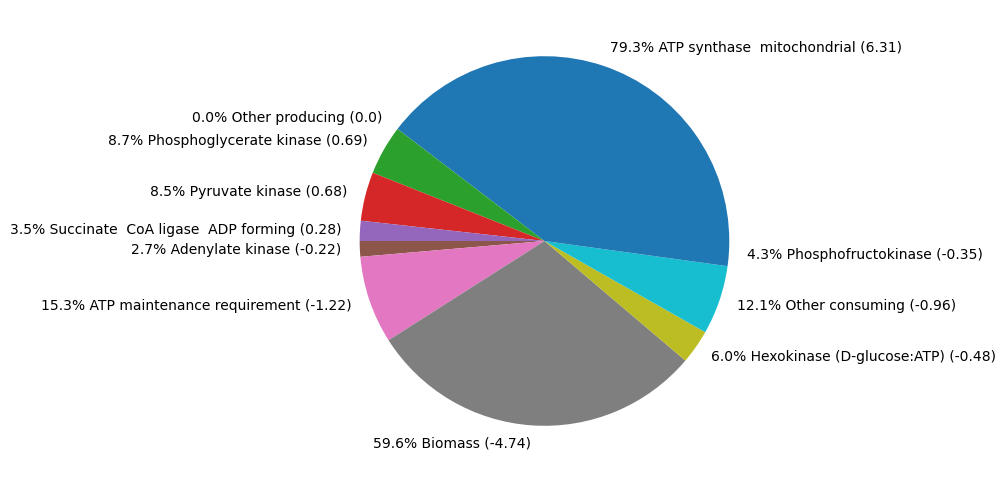

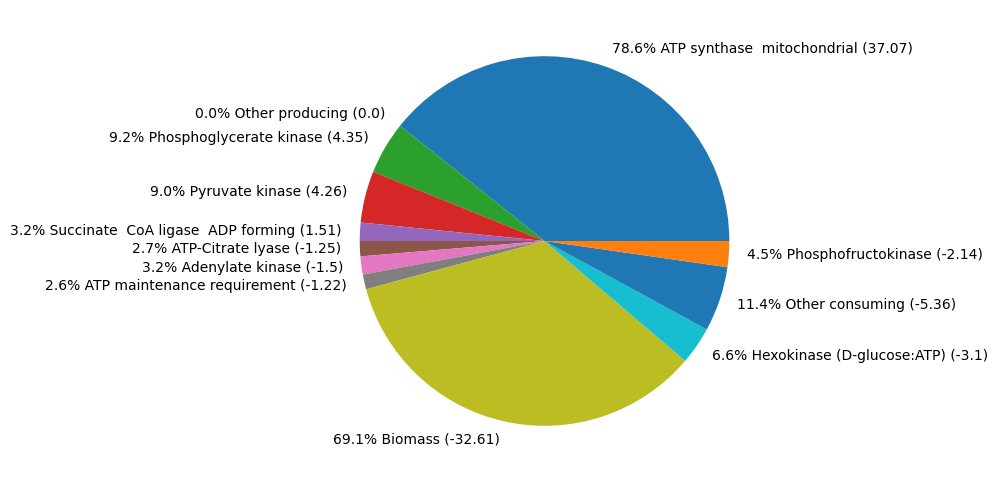

In [11]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

### NGAM minimisation

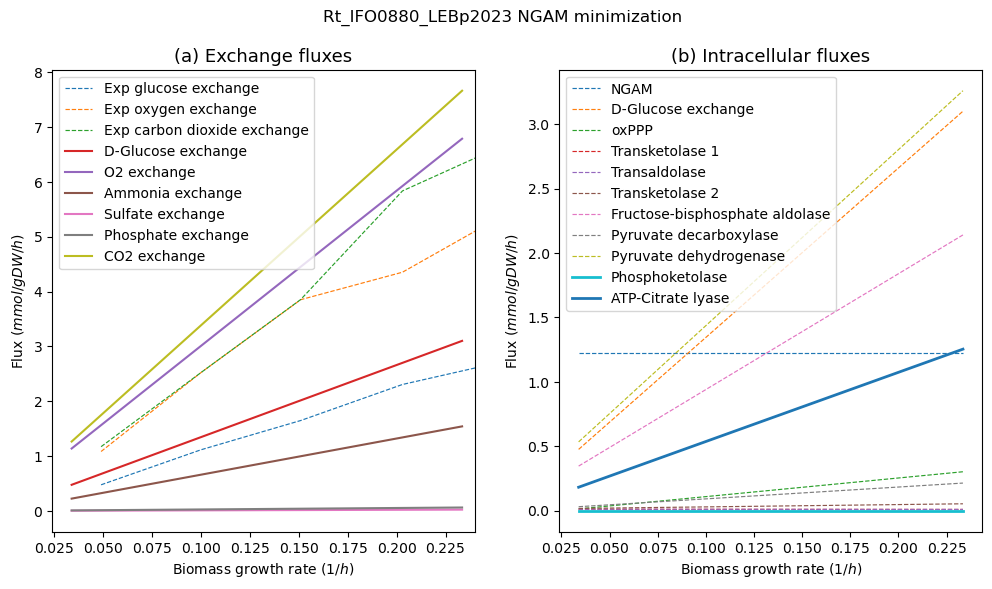

In [4]:
# growth_rates =  [0.03371, 0.08199, 0.12239, 0.17211, 0.23226] # nonrounded GR from biomass maz sim [0.033713, 0.081992, 0.122398, 0.172112, 0.232267] # rounded, gives different values for ATPM [0.03, 0.08, 0.12, 0.17, 0.23] #
NGAM_rxn_ID = "ATPM"

IFOjsb_all_fluxes_nm = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, exchange_metabolites)

intracellular_metabolites = ['ATPM', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'FBA', 'PYRDC','PDHm']
intracellular_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, intracellular_metabolites)

phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, IFOjsb_all_fluxes_nm, ['XPK', 'ACITL'])

title = 'Rt_IFO0880_LEBp2023 NGAM minimization'
fig = f.plot_ex_intr_fluxes(IFOjsb_all_fluxes_nm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_NGAM_min.png")

Cofactor balances

SUM produced: 0.5721775402344639, SUM consumed: -0.572177540234478
SUM produced: 1.3894402980085439, SUM consumed: -1.3894402980085478
SUM produced: 3.933458851205151, SUM consumed: -3.9334588512051507


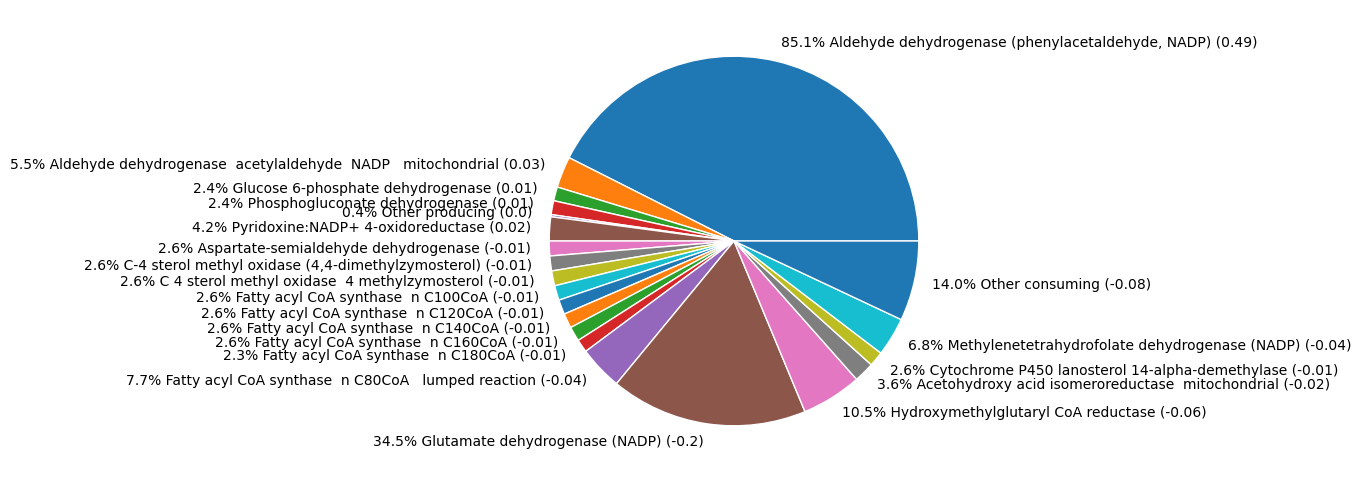

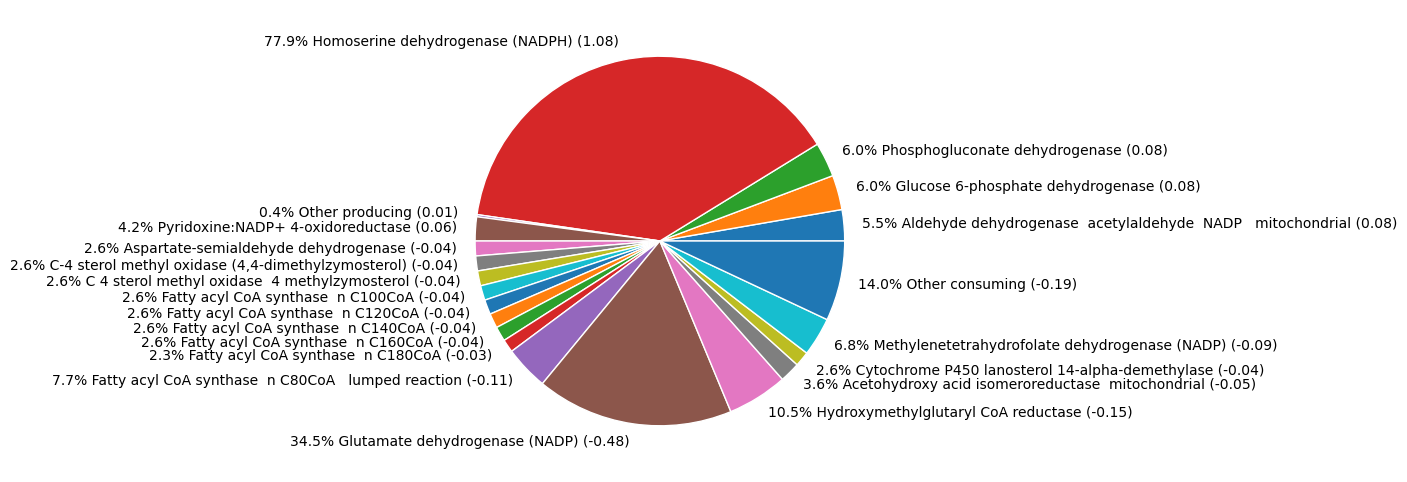

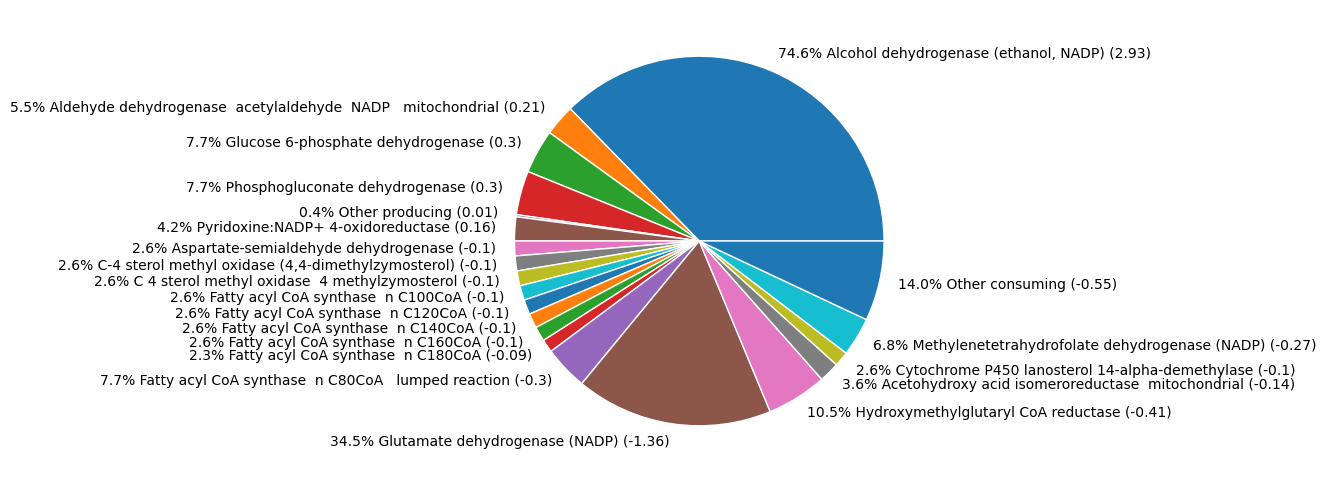

In [23]:

NGAM_rxn_ID = 'ATPM'
nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH.png")

nadph_fluxes_1 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 1)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH1.png")

 
# nadph_fluxes_2 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 2)
# pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)

# nadph_fluxes_3 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 3)
# pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3) 

nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADPH_max.png")
 
# pie_nadph_fluxes_0
# pie_nadph_fluxes_1
# pie_nadph_fluxes_2
# pie_nadph_fluxes_3
# pie_nadph_fluxes_4

SUM produced: 2.4421963190488323, SUM consumed: -2.442196319048832
SUM produced: 14.721595438245297, SUM consumed: -14.721595438245219


([<matplotlib.patches.Wedge at 0x24b451399d0>,
 [Text(1.0857646129311325, 0.17639502630887444, '10.3% 2-oxoglutarate dehydrogenase (1.51)'),
  Text(0.7775314066101935, 0.7781034068392029, '29.5% Glyceraldehyde-3-phosphate dehydrogenase (4.35)'),
  Text(0.1435110154788385, 1.0905982708753177, '12.1% Isocitrate dehydrogenase  NAD (1.79)'),
  Text(-0.4457436722014168, 1.0056403823894484, '22.8% Malate dehydrogenase  mitochondrial (3.35)'),
  Text(-0.8080250143888804, 0.7463883547603417, '3.2% Other producing (0.47)'),
  Text(-1.0341598526109888, 0.374851169462786, '22.1% Pyruvate dehydrogenase (3.26)'),
  Text(-1.0465181435875273, -0.33882115509825494, '19.9% Aldehyde dehydrogenase (phenylacetaldehyde, NAD) (-2.93)'),
  Text(-0.7882969428794054, -0.7671948447734666, '9.3% malate dehydrogenase (-1.36)'),
  Text(0.4580228774505614, -1.0001075160860997, '68.9% NADH dehydrogenase, mitochondrial (-10.15)'),
  Text(1.0995292375271901, -0.03217849938819531, '1.9% Other consuming (-0.27)')])

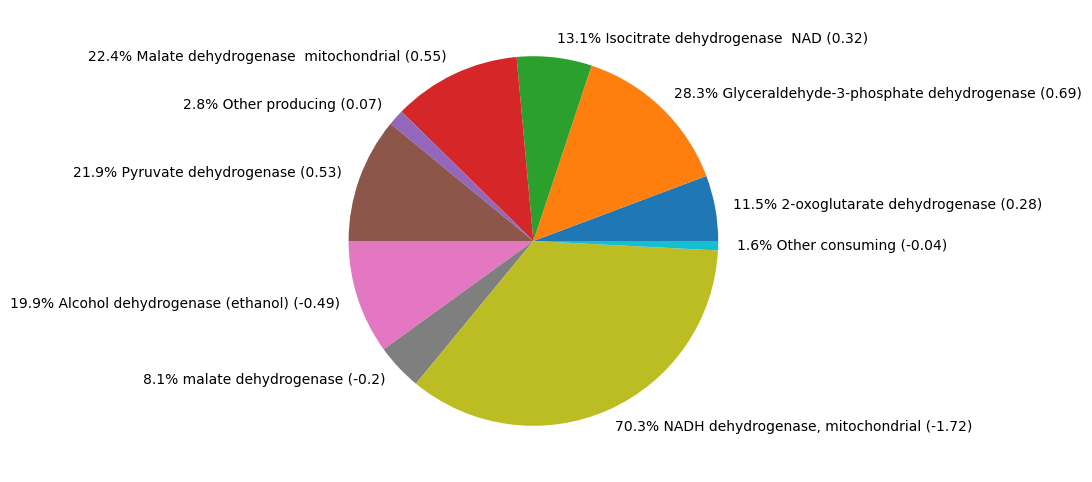

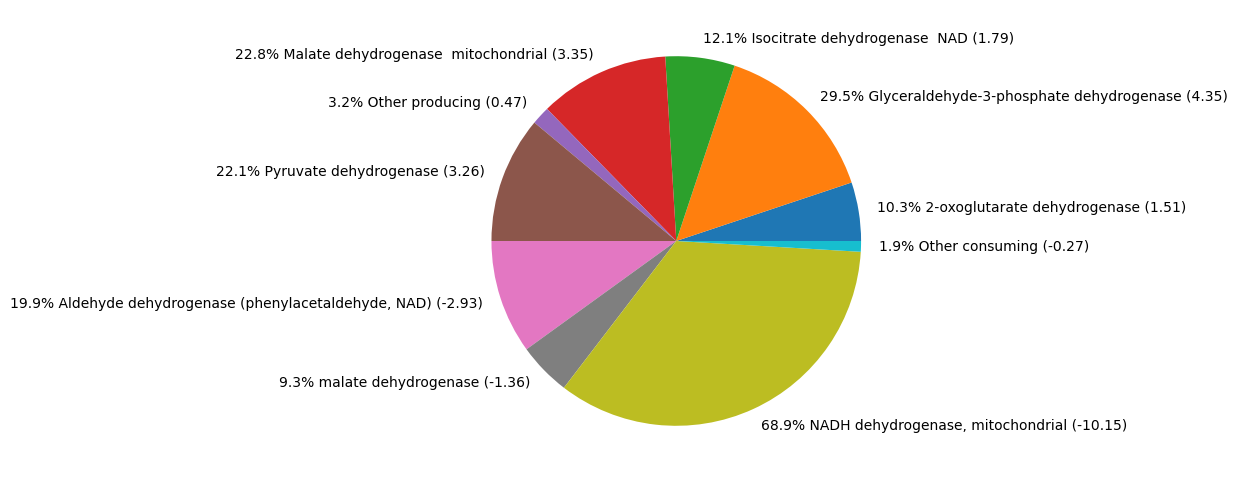

In [14]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 7.966086039660551, SUM consumed: -7.966086039660548
SUM produced: 47.182778162604414, SUM consumed: -47.18277816260424


([<matplotlib.patches.Wedge at 0x24b3fa16a20>,
 [Text(0.3633953585062925, 1.0382407299928487, '78.6% ATP synthase  mitochondrial (37.07)'),
  Text(-0.8599341401004184, 0.6859397019343276, '0.0% Other producing (0.0)'),
  Text(-0.9498674023497118, 0.5547539255863008, '9.2% Phosphoglycerate kinase (4.35)'),
  Text(-1.067901116979157, 0.2637938671665223, '9.0% Pyruvate kinase (4.26)'),
  Text(-1.0986138344384004, 0.05520545969879238, '3.2% Succinate  CoA ligase  ADP forming (1.51)'),
  Text(-1.0990419701516008, -0.04589932292842742, '2.7% ATP-Citrate lyase (-1.25)'),
  Text(-1.0902455194360414, -0.14616671081212917, '3.2% Adenylate kinase (-1.5)'),
  Text(-1.0725954464773202, -0.2440061642584436, '2.6% ATP maintenance requirement (-1.22)'),
  Text(-0.2408840558635746, -1.0733009231481703, '69.1% Biomass (-32.61)'),
  Text(0.9062230264969614, -0.6235060755491382, '6.6% Hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.043824326835423, -0.347031374239529, '11.4% Other consuming (-5.36)'),
  Tex

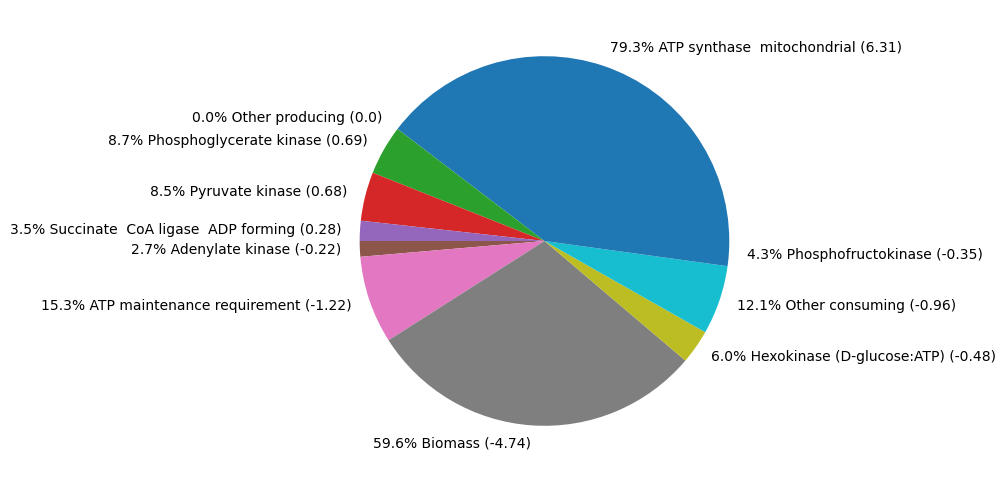

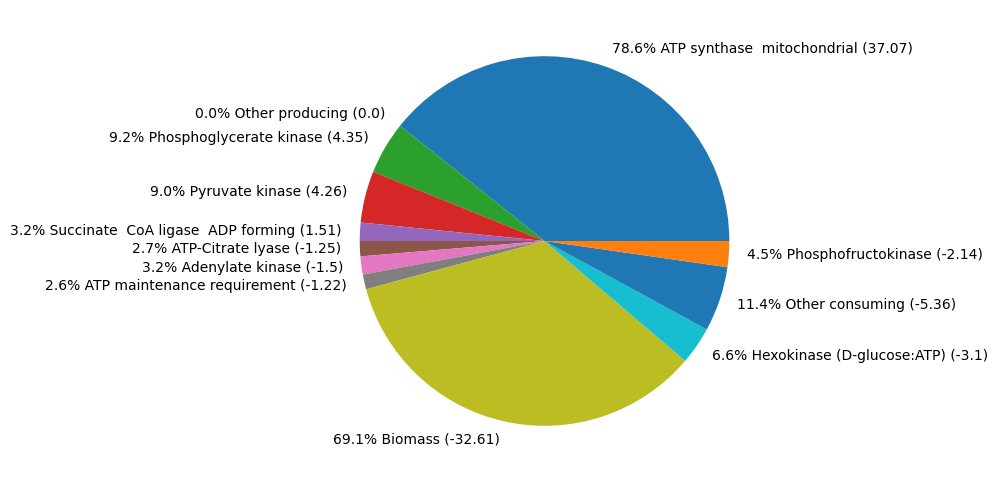

In [15]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
#fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\Rt_IFO0880_LEBp2023_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [16]:
# import pickle

# with open("../cofactor_comparison/IFO0880_jsb_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)